In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
#importing neccessary libraries
import time
import numpy as np
from scipy import stats
import networkx as nx
from tabulate import tabulate
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm
%matplotlib inline

In [ ]:
''' input: graph
    output: edge to be removed
    description: This function takes graph as an input and returns the edge which has highest betweeness score'''
def edgeToRemove(graph):
    dict_betweenness = nx.edge_betweenness_centrality(graph)
    edge = ()
    # Edges of the graph are eliminated iteratively based on Highest Edge Betweeness Centrality Score
    for key, value in sorted(dict_betweenness.items(), key=lambda item: item[1], reverse = True):
        edge = key
        break
    return edge


In [ ]:
''' Function to computes betweenness-based clustering using the Girvan-Newman algorithm) 
'''
def girvanNewman(graph):
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edgeToRemove(graph)[0], edgeToRemove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg

In [37]:
""" Reading the follwoing Graphs """
karate = nx.read_gml('/content/gdrive/MyDrive/Sem-3/Social media analysis/Assignment-1/karate.gml', label = 'id')
dolphins = nx.read_gml('/content/gdrive/MyDrive/Sem-3/Social media analysis/Assignment-1/dolphins.gml')
jazz = nx.read_weighted_edgelist('/content/gdrive/MyDrive/Sem-3/Social media analysis/Assignment-1/jazz.net')

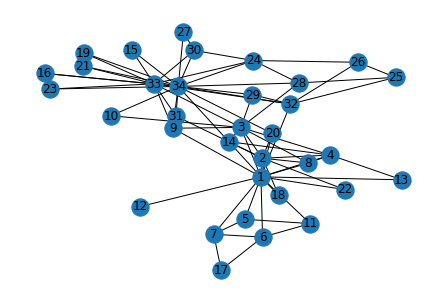

In [ ]:
""" Drawing Karate Graph"""
nx.draw(karate, with_labels = True)

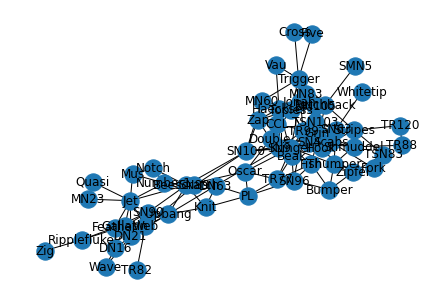

In [ ]:
""" Drawing Dolphins Graph"""
nx.draw(dolphins, with_labels = True)

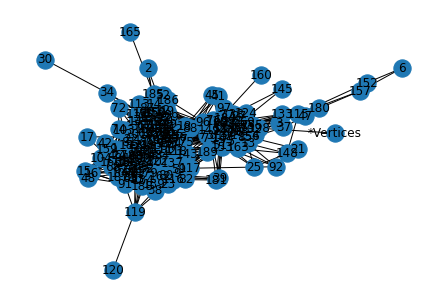

In [ ]:
""" Drawing Jazz Graph"""
nx.draw(jazz, with_labels = True)

In [38]:
nx.write_gexf(karate, "/content/gdrive/MyDrive/Sem-3/Social media analysis/Assignment-1/Karate.gexf")
nx.write_gexf(dolphins, "/content/gdrive/MyDrive/Sem-3/Social media analysis/Assignment-1/Dolphins.gexf")
nx.write_gexf(jazz, "/content/gdrive/MyDrive/Sem-3/Social media analysis/Assignment-1/Jazz.gexf")

In [ ]:
"""Statistics:
   Computing the following statistics describing the datasets:
    • number of nodes n,
    • number of edges m
    • average path lengths d ̄
    • average clustering coefficient C"""

statistics = [["Social Network", "Number of Nodes", "Number of Edges", "Average Path Lengths", "Average Clustering Cofficient"],
         ["Karate", len(karate.nodes), len(karate.edges), nx.average_shortest_path_length(karate), nx.average_clustering(karate)],
         ["Dolphins", len(dolphins.nodes), len(dolphins.edges), nx.average_shortest_path_length(dolphins), nx.average_clustering(dolphins)],
         ["Jazz", len(jazz.nodes), len(jazz.edges), nx.average_shortest_path_length(jazz), nx.average_clustering(jazz)]]

print(tabulate(statistics))

--------------  ---------------  ---------------  --------------------  -----------------------------
Social Network  Number of Nodes  Number of Edges  Average Path Lengths  Average Clustering Cofficient
Karate          34               78               2.408199643493761     0.5706384782076823
Dolphins        62               159              3.3569539925965097    0.2589582460550202
Jazz            199              2743             2.2480077153443987    0.6138325373058027
--------------  ---------------  ---------------  --------------------  -----------------------------


In [ ]:
""" Running betweenness-based clustering 
    using the Girvan-Newman Algorithm
    On KARATE Dataset """

# Number of Communities
karateCommunities = girvanNewman(karate.copy())

#Finding different Node Groups
karateNodeGroups = []
for i in karateCommunities:
  karateNodeGroups.append(list(i))

# Number of Nodes in Each Community
karateClusters = len(karateNodeGroups)

#Calculating Time taken by to get this number re-execute your computation 5-10 times and take the mode runtime
timeList = []
for i in range(0, 9):
  start = time.time()
  # Number of Communities
  c = girvanNewman(karate.copy())
  # Number of Nodes in Each Community
  node_groups = []
  for i in c:
    node_groups.append(list(i))
  end = time.time()
  # Time Taken for the computation
  timeList.append(end - start)

array = np.array(timeList)
karateTimeTaken = stats.mode(array)

In [ ]:
""" Running betweenness-based clustering 
    using the Girvan-Newman Algorithm
    On DOLPHINS Dataset """

# Number of Communities
dolphinsCommunities = girvanNewman(dolphins.copy())

#Finding different Node Groups
dolphinsNodeGroups = []
for i in dolphinsCommunities:
  dolphinsNodeGroups.append(list(i))

# Number of Nodes in Each Community
dolphinsClusters = len(dolphinsNodeGroups)

#Calculating Time taken by to get this number re-execute your computation 5-10 times and take the mode runtime
timeList = []
for i in range(0, 9):
  start = time.time()
  # Number of Communities
  c = girvanNewman(dolphins.copy())
  # Number of Nodes in Each Community
  node_groups = []
  for i in c:
    node_groups.append(list(i))
  end = time.time()
  # Time Taken for the computation
  timeList.append(end - start)

array = np.array(timeList)
dolphinsTimeTaken = stats.mode(array)

In [ ]:
""" Running betweenness-based clustering 
    using the Girvan-Newman Algorithm
    On JAZZ Dataset """

# Number of Communities
jazzCommunities = girvanNewman(jazz.copy())

#Finding different Node Groups
jazzNodeGroups = []
for i in jazzCommunities:
  jazzNodeGroups.append(list(i))

# Number of Nodes in Each Community
jazzClusters = len(jazzNodeGroups)

#Calculating Time taken by to get this number re-execute your computation 5-10 times and take the mode runtime
timeList = []
for i in range(0, 9):
  start = time.time()
  # Number of Communities
  c = girvanNewman(jazz.copy())
  # Number of Nodes in Each Community
  node_groups = []
  for i in c:
    node_groups.append(list(i))
  end = time.time()
  # Time Taken for the computation
  timeList.append(end - start)

array = np.array(timeList)
jazzTimeTaken = stats.mode(array)

In [ ]:
table = [["Social Network", "Number of clusters found", "Modularity score for this clustering", "Run time"],
         ["Karate", len(karateNodeGroups), str(nx_comm.modularity(karate, karateNodeGroups)), karateTimeTaken[0]],
         ["Dolphins", len(dolphinsNodeGroups), str(nx_comm.modularity(dolphins, dolphinsNodeGroups)), dolphinsTimeTaken[0]],
         ["Jazz", len(jazzNodeGroups), str(nx_comm.modularity(jazz, jazzNodeGroups)), jazzTimeTaken[0]]]

print(tabulate(table))

--------------  ------------------------  ------------------------------------  ------------
Social Network  Number of clusters found  Modularity score for this clustering  Run time
Karate          2                         0.3599605522682445                    [0.10704899]
Dolphins        2                         0.3787033740753925                    [0.20052075]
Jazz            2                         0.003628631339322768                  [7.85532427]
--------------  ------------------------  ------------------------------------  ------------
